# Source: Tensorflow tutorial

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [14]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\tools")
import hsi_io as io
import hsi_decompositions as dc

In [38]:
fpath = "D:/elena/Google Drive/titech/research/experiments/output/hsi/handsOnly/rgb"
allImage = io.load_crop(fpath) 

In [39]:
allImage = np.array(allImage)

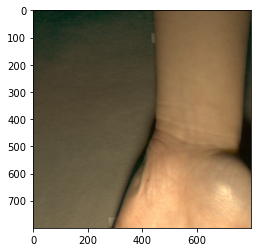

(800, 800, 3)
(800, 800, 3)
(800, 800, 3)
(800, 800, 3)
(800, 800, 3)
(800, 800, 3)
(800, 800, 3)
(800, 800, 3)
(800, 800, 3)


[None, None, None, None, None, None, None, None, None]

In [40]:
io.show_image(allImage[0])
allImage.shape
[print(allImage[i].shape) for i in range(len(allImage))]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(allImage, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

(8, 800, 800, 3) (1, 800, 800, 3)


## Builds autoencoder 

In [28]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size, activation='relu'))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape), activation='sigmoid')) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [43]:
img_shape = allImage.shape[1:]
print(img_shape)

encoder, decoder = build_autoencoder(img_shape, 1024)

inp = Input(img_shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
#autoencoder.compile(optimizer='adamax', loss='mse')
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

print(autoencoder.summary())

(800, 800, 3)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 800, 800, 3)]     0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 1024)              1966081024
_________________________________________________________________
sequential_5 (Sequential)    (None, 800, 800, 3)       1968000000
Total params: -360,886,272
Trainable params: -360,886,272
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\foxel\anaconda3\envs\hsi\lib\site-packages\keras\utils\layer_utils.py:102: RuntimeWarning: overflow encountered in long_scalars
  return int(sum(np.prod(p) for p in standardized_weight_shapes))


In [44]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=20,
                validation_data=(X_test, X_test))

Epoch 1/20
1/1 [==============================] - 32s 32s/step - loss: 0.0604 - val_loss: 0.0296
Epoch 2/20
1/1 [==============================] - 49s 49s/step - loss: 0.0608 - val_loss: 0.0316
Epoch 3/20
1/1 [==============================] - 28s 28s/step - loss: 0.0632 - val_loss: 0.0332
Epoch 4/20
1/1 [==============================] - 24s 24s/step - loss: 0.0637 - val_loss: 0.0337
Epoch 5/20
1/1 [==============================] - 16s 16s/step - loss: 0.0621 - val_loss: 0.0232
Epoch 6/20
1/1 [==============================] - 21s 21s/step - loss: 0.0500 - val_loss: 0.0172
Epoch 7/20
1/1 [==============================] - 20s 20s/step - loss: 0.0379 - val_loss: 0.0270
Epoch 8/20
1/1 [==============================] - 13s 13s/step - loss: 0.0434 - val_loss: 0.0172
Epoch 9/20
1/1 [==============================] - 9s 9s/step - loss: 0.0330 - val_loss: 0.0202
Epoch 10/20
1/1 [==============================] - 9s 9s/step - loss: 0.0460 - val_loss: 0.0196
Epoch 11/20
1/1 [================

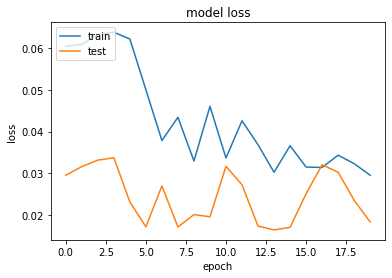

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

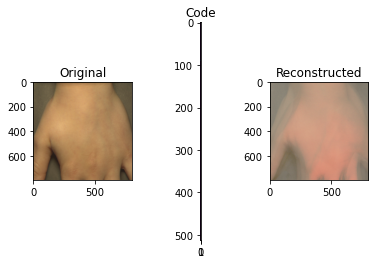

In [50]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(reco)
    plt.show()

for i in range(len(X_test)):
    img = X_test[i]
    visualize(img,encoder,decoder)